# Kickstarter Classficiation

Data: https://www.kaggle.com/kemical/kickstarter-projects/

Presentation: https://docs.google.com/presentation/d/15P199H4aanGbv7MW8AMpRKZiysh8MUIMzfYLxEmA0I0/edit?usp=sharing

Members: 
Kai Chen Tan,
Qi Jing Yap,
Yuqing Yang,
Steven Salmeron


![](kickstarter_header.png)

# Background Information

## What is Kickstarter?

Kickstarter is a fundraising platform with the goal to help “bring creative projects to life” by providing a way for creators and artists to be funded directly by fans of their projects. The platform was launched on April 28, 2009 and has seen over 450,000 projects pass through it since then. 

## Basics of a Kickstarter Project

Each campaign has a unique Kickstarter ID used for internal identification. Each project also has a title name that allows people to find and refer to it with. The name of a project does not need to be unique. Kickstarter has made it easier to distinguish one project from another with the use of 15 main categories: Art, Comics, Crafts, Dance, Design, Fashion, Film & Video, Food, Games, Journalism, Music, Photography, Publishing, Technology, and Theater. Subcategories are also attached to a project to further classify it beyond the main category. For instance, under the main category Fashion, the subcategories are apparel, accessories, jewelry, footware, etc. 

People who help fund a project are known as its ‘backers’ and the money they contribute is their ‘pledge’. Backing a project gives backers an opportunity to contribute to something they wish to see succeed and also to receive a reward if their pledges are high enough. Rewards are usually tiered by the amount pledged and it is a strategy used by creators to incentivize backers to pledge more. Rewards often include the product itself if the project involves some sort of product, company swags, and possibly also a meetup with the creators for high pledges.

Projects are required to launch with a specified goal, and the goal is usually an amount that the team has determined to be the minimum they need to proceed with the project. Since Kickstarter is a global platform and projects can be started in 22 different countries, not all campaigns are measured in USD. The goal and pledges can be processed in the local currency of each project.

Before launching a project, the creator has to set a starting date, as well as a dealine. The maximum length for a project used to be 90 days but was lowered to 60 in 2011. As soon as the project reaches its deadline, it can no longer receive pledges. 
- A project that reaches its goal by the deadline is considered successful and receives the pledged funding. Kickstarter collects a 5% fee from the funding total, and a payment processing fee between 3-5% will also be collected.
- A project that fails to meet its goal is considered failed regardless of how close it was to reaching the goal. Kickstarter will not collect any funds from the backers of a failed project, and the creators will receive no funding. This all-or-nothing model is meant to prevent disappointment in scenarios where a team may attempt to proceed with a project when only a tenth of the goal was reached and can no longer meet the standards that backers may have been expecting. Due to this policy, many ambitious projects choose to set a minimum goal for their campaign and include stretch goals, which are funding milestones where additional features not exactly necessary for the project will be worked on if reached. 
- A project can be cancelled early if the creator has decided to not continue the project.
- A project can also be suspended if Kickstarter decides that it is in violation of the platform's policies upon further review.

## How was the Data Collected?

The dataset being analyzed for this project was scraped from Kickstarter platform by a Kaggle user, Mickaël Mouillé. This dataset contains information of over 300,000 Kickstarter projects up to January 2, 2018.

## Discussion of Variables

### 1. Each Column

- 'ID' is the internal Kickstarter ID, unique for each project.
- 'name' is the name of a project.
- 'category' is the subcategory a project belongs to. There are 5 to 20 subcategories within each main category.
- 'main_category' is a classification of projects based on shared characteristics. There are 15 main categories set by Kickstarter.
- 'currency' is the local currency used for the campaign.
- 'deadline' is the date a project was scheduled to end.
- 'goal' is the fundraising goal set by the creator of a project. Data in this column is of different currency types and not standardized.
- 'launched' gives the date and time the project was started in the platform.
- 'pledged' is the amount of money a project fundraised. Data in this column is of different currency types and not standardized.
- 'state' indicates the outcome of a project, whether it was successful, failed, cancelled or suspended. Ongoing projects are labeled as live, and some project status are undefined. 
- 'backers' is the number of backers who have agreed to contribute to a project.
- 'country' gives the abbreviation of the country where the Kickstarter project was launched.
- 'usd pledged' is the conversion of the 'pledged' column to US dollars (conversion done by Kickstarter).
- 'usd_pledged_real' is the amount of money a project fundraised. Data in the 'pledged' column is converted to USD and standardized.
- 'usd_goal_real' is the fundraising goal. Data in the 'goal' column is converted to USD and standardized.

### 2. Each Row

Each row is a record of the performance of one unique project with the Kickstarter internal ID as the unique identifier. 

## Research Review

We have looked a number of articles that attempt to explain what differentiates a successful campaign from a failed one. Forbes, in their article, “Crowdfunding Secrets: 7 Tips For Kickstarter Success”, advises to look for additional funding elsewhere, and to keep a campaign’s goal reasonable because it is easier to reach and backers are more likely to be attracted to projects that are already close to or have exceeded their goal. Wired also recommends keeping a campaign’s goal below a certain amount; their recommended amount is $10,000 for the best odds of success. Similarly, they recommend having a campaign last 30 days; more makes the project appear unconfident and Wired finds these are less likely to succeed. “What Makes a Successful Kickstarter Campaign?”, by Toward Data Science, looks at how success rate changes by specific category and describes a model they designed to predict Kickstarter success. Factors they use include project length, goal, and category.

Many of these include factors such as the “realness” of the problem the project aims to address, whether the campaign includes a video, the social media presence of the team, and other factors we do not have access to in our dataset. Because our data comes from Kaggle, however, we can take a look at what people have previously done with this specific set in the past. One notebook, simply titled, “Kickstarter - Successful vs Failed”, tackles a similar question to ours. It follows up its method of processing that data with a bar plot showing success rate by category, showing dance and theater as the most successful categories. It then establishes the median goal of failed Kickstarters is always higher than that of successful ones for any given category and affirms this is not caused by significant outliers anywhere. They note that most failed projects do not reach over 20% of their funding goal, but this is not because of time constraints. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
kickstarter = pd.read_csv('data.csv') #Reading in the data

In [4]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
kickstarter.shape

(378661, 15)

# Exploratory Analysis of the Data

## Data Cleaning

### 1. Drop Columns

In [6]:
kickstarter = kickstarter.drop(columns = ['pledged', 'goal', 'usd pledged'])
kickstarter.shape

(378661, 12)

We have decided to remove the columns <font color=blue>pledged</font> and <font color=blue>goal</font> because data in these two columns are in different currency types and not standardized. Instead, we will be using columns <font color=blue>usd_pledged_real</font> and <font color=blue>usd_goal_real</font>, which are the same numbers converted to USD and standardized. In addition, <font color=blue>usd pledged</font> is removed because the conversion done by this column is more problematic. The same information is provided by the variable <font color=blue>usd_pledged_real</font>.

### 2. Data Types

In [7]:
print(kickstarter.dtypes)

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
launched             object
state                object
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
dtype: object


Since <font color=blue>deadline</font> and <font color=blue>launched</font> are objects, we convert them to date-time type.

In [8]:
kickstarter['deadline'] = pd.to_datetime(kickstarter.deadline)
kickstarter['launched'] = pd.to_datetime(kickstarter.launched)

### 3. Check for Duplicates

In [9]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
launched            378661 non-null datetime64[ns]
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 34.7+ MB


We notice that <font color='blue'>name</font> is the only column that does not have 378661 unique entries. 

In [10]:
print(kickstarter[kickstarter.duplicated()])

Empty DataFrame
Columns: [ID, name, category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real]
Index: []


There are no completely duplicated rows in our DataFrame since there are unique IDs to each project.

In [11]:
print(kickstarter['ID'].nunique())
print(kickstarter['name'].nunique()) #strange, ~3000 rows seem to have duplicated names with unique IDs

#print(kickstarter[kickstarter['ID'].duplicated(keep = False)].sort_values(by = 'ID'))
kickstarter[kickstarter['name'].duplicated(keep = False)].sort_values(by = 'name').head(4)

378661
375764


,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,2013-12-19 21:51:50,canceled,0,US,0.0,6500.0
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,2014-01-03 20:39:16,failed,3,US,37.0,6500.0
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,2011-08-28 21:27:52,successful,24,US,3000.0,3000.0
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,2013-01-26 03:51:47,failed,26,US,1417.0,5000.0


While the <font color='blue'>ID</font> column has 378661 entries with no duplicates, there are about 2897 instances of repeated <font color='blue'>name</font> in our dataset. We found out that this is because multiple projects can take on the exact same name. Some projects are also relaunched with the same name.

### 4. Check for Problematic Rows

#### (a) Missing Values

In [12]:
print(kickstarter.isna().sum()) # check for NAs
index_A = kickstarter[kickstarter.name.isna()].index

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64


There are 4 NAs in the <font color='blue'>name</font> column. We save the indexes of these missing values for later deletion.

#### (b) Launched

In [13]:
print(kickstarter.launched.sort_values().head(10))
index_B = kickstarter.launched.sort_values()[0:7].index

75397    1970-01-01 01:00:00
319002   1970-01-01 01:00:00
2842     1970-01-01 01:00:00
94579    1970-01-01 01:00:00
247913   1970-01-01 01:00:00
273779   1970-01-01 01:00:00
48147    1970-01-01 01:00:00
169268   2009-04-21 21:02:48
322000   2009-04-23 00:07:53
138572   2009-04-24 21:52:03
Name: launched, dtype: datetime64[ns]


When exploring the data, we discover that 7 projects have <font color='blue'>launched</font> dates in the year 1970. Since Kickstarter was only founded in 2009, these results are not possible. We also save these indexes for later deletion.

#### (c) State

In [14]:
success = kickstarter[kickstarter['usd_pledged_real'] >= kickstarter['usd_goal_real']] 
wrong = success[success['state']=='failed']
index_C = wrong.index
wrong.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
16780,1085047405,"""Balance""",Jazz,Music,USD,2013-04-04,2013-03-05 10:55:56,failed,141,US,23020.01,23000.0
58558,1297794474,Music Empowers - A Day with the Accende Ensemble,Classical Music,Music,USD,2012-01-04,2011-11-07 15:20:24,failed,20,US,3087.50,3000.0
136909,1695255515,"POPE! an epic musical, opening at NY Fringe Fe...",Theater,Theater,USD,2010-08-20,2010-07-21 05:48:11,failed,30,US,3600.00,3600.0
216545,2103203254,The new face of Canadian Science Fiction,Fiction,Publishing,USD,2010-05-16,2010-03-18 04:35:31,failed,66,US,10797.00,10000.0
298960,59246799,Key Wrench - Unlock Your Life!,Product Design,Design,USD,2013-10-04,2013-08-24 05:42:10,failed,208,US,6183.00,6000.0


We identify 6 projects that had their <font color = 'blue'>usd_pledged_real</font> meeting their <font color = 'blue'>usd_goal_real</font>, yet were considered failed. This is an error, since Kickstarter by definition awards projects that met their goals as successful. A good example of this can be found in the following link.

https://www.kickstarter.com/projects/1755876060/music-empowers-a-day-with-the-accende-ensemble/ (3,087 pledged of 3,000 goal, "Funding Unsuccessful"). We save the indexes of these rows for deletion.

#### (d) Undefined Country and State

In [15]:
undefined = kickstarter[kickstarter['state'] == 'undefined']
print(undefined.country.unique())
index_D = kickstarter[kickstarter.country == 'N,0"'].index

['N,0"']


Finally, we save the rows with a nonsensical country code of 'N,0'. Interestingly, these rows also contain the same rows where the <font color='blue'>state</font> was considered 'undefined'.

### 5. Remove Problematic Rows

In [16]:
allindexes_remove = list(index_A) + list(index_B) + list(index_C) + list(index_D)
print(len(set(allindexes_remove))) 
print(len(allindexes_remove) == len(set(allindexes_remove)))
kickstarter_cleaned = kickstarter.drop(labels=allindexes_remove)
kickstarter_cleaned.shape

3814
True


(374847, 12)

Now, we have removed the 3814 rows corresponding to all the indexes saved above. After filtering our dataset, the shape of our DataFrame has gone from (378661,15) to (374847, 15), a removal of approximately 1.01% of the original data.

### 6. Feature Engineering

In order to prepare the data for further analysis and modeling, we have created a few new features from existing ones. The list of features created are as follows:

1. <font color = 'blue'>project_length</font>: This feature tracks the number of days between a project's launch date and deadline where a project was active for. We also checked for negative values, which did not exist thankfully.
2. <font color = 'blue'>pledged_per_backer</font>: This feature tracks the mean amount of money (converted to USD) pledged by each individual backer. We have removed rows with <font color = 'blue'>pledged_per_backer</font> listed as Inf, as these are caused by projects with 0 backers. We want to use this variable in our prediction model later and a value of zero pledged per backer is the same information as zero backers, which will create bias in the predictive model.
3. <font color = 'blue'>percent_funded</font>: This feature tracks the percentage of the goal amount achieved.

In [17]:
# project length
kickstarter_cleaned['deadline'] = pd.to_datetime(kickstarter_cleaned.deadline)
kickstarter_cleaned['launched'] = pd.to_datetime(kickstarter_cleaned.launched)
kickstarter_cleaned['project_length'] = kickstarter_cleaned['deadline'] - kickstarter_cleaned['launched']
kickstarter_cleaned['project_length'] = kickstarter_cleaned.project_length.dt.days

# pledged per backer
kickstarter_cleaned['pledged_per_backer'] = kickstarter_cleaned['usd_pledged_real'] / kickstarter_cleaned['backers']
kickstarter_cleaned = kickstarter_cleaned[~kickstarter_cleaned.isin([np.nan, np.inf, -np.inf]).any(1)] #51,804 rows removed

# percent funded
kickstarter_cleaned['percent_funded'] = np.round((kickstarter_cleaned['usd_pledged_real'] / kickstarter_cleaned['usd_goal_real']),4)

print(kickstarter_cleaned.shape)
kickstarter_cleaned.head()

(323043, 15)


,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_length,pledged_per_backer,percent_funded
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.0,59,161.400000,0.0807
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.0,44,73.333333,0.0049
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.0,29,1.000000,0.0002
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.0,55,91.642857,0.0658
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.0,34,233.816964,1.0475


### 7. Filter States

In [18]:
kickstarter_cleaned.state.value_counts()

failed        158968
successful    133851
canceled       26744
live            2250
suspended       1230
Name: state, dtype: int64

In [19]:
kickstarter_cleaned = kickstarter_cleaned[(kickstarter_cleaned['state'] == 'failed') | (kickstarter_cleaned['state'] == 'successful')]
kickstarter_cleaned.shape

(292819, 15)

Finally, we have decided to keep only rows with states "Failed" or "Successful" because we are only interested in these two outcomes of the projects. Live projects are removed because they are projects that are still ongoing when this dataset was scraped. Besides that, projects with states canceled and suspended are removed because there are many factors that contribute to the state that cannot be accounted by the variables given in this dataset. 

The final dataset that is going to be used for analysis in this project has a shape of (292819,15).

## Summary Statistics 

In [20]:
kickstarter_cleaned.state.value_counts(normalize = True)

failed        0.542888
successful    0.457112
Name: state, dtype: float64

Overall, there is a higher proportion of failed projects than successful ones on Kickstarter.

In [21]:
kickstarter_cleaned.get(['backers','usd_pledged_real','usd_goal_real','pledged_per_backer','percent_funded']).describe()

,backers,usd_pledged_real,usd_goal_real,pledged_per_backer,percent_funded
count,292819.000000,2.928190e+05,2.928190e+05,292819.000000,292819.000000
mean,131.822952,1.125146e+04,3.508721e+04,74.852948,3.975700
std,1026.496090,1.027534e+05,9.336281e+05,137.706360,300.693822
min,1.000000,4.500000e-01,1.000000e-02,0.450000,0.000000
25%,4.000000,1.500000e+02,2.000000e+03,25.715000,0.030200
50%,22.000000,1.235960e+03,5.000000e+03,48.957143,0.386500
75%,74.000000,5.495130e+03,1.500000e+04,84.606984,1.133500
max,219382.000000,2.033899e+07,1.101698e+08,10000.000000,104277.890000


By looking at the distribution of numerical variables in the dataset, we can see that the means of the columns <font color = 'blue'>backers</font>, <font color = 'blue'>usd_pledged_real</font>, and <font color = 'blue'>percent_funded</font> are much larger than their medians. This tells us that there are highly successful projects that have inflated the means. We have decided not to remove these outliers since we will not be using these columns in our model. We will further investigate the highly successful projects later on.

The columns <font color = 'blue'>usd_goal_real</font> and <font color = 'blue'>pledged_per_backer</font> have mean and median that are close to one another. This makes sense because creators tend not to set overly ambitious goals. Since <font color = 'blue'>pledged_per_backer</font> is a ratio, the maximum value does not inflate the mean that much because a high pledge is usually caused by a high number of backers.

## Guiding Question 1: Which category is the most well-funded?

### Success Rate by Category

In [22]:
grouped = kickstarter_cleaned.groupby(['main_category','state']).ID.count()
total = kickstarter_cleaned.groupby('main_category').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='successful')
prop

state,failed,successful
main_category,,
Technology,0.72,0.28
Journalism,0.69,0.31
Crafts,0.68,0.32
Food,0.68,0.32
Fashion,0.66,0.34
Photography,0.60,0.40
Publishing,0.59,0.41
Design,0.56,0.44
Games,0.54,0.46


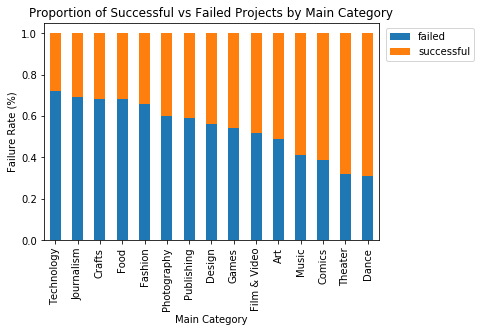

In [23]:
prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Main Category')
plt.ylabel('Failure Rate (%)')
plt.xlabel('Main Category')
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1))
plt.show()

The top 3 main categories with the highest success rates are Dance, Theater, and Comics. On the other hand, Technology, Journalism and Crafts have the lowest success rates. This lines up with previous research. We continue to look at the number of projects in each category to check for the presence of any relationship based on category.

### Frequency of Project v.s. Category

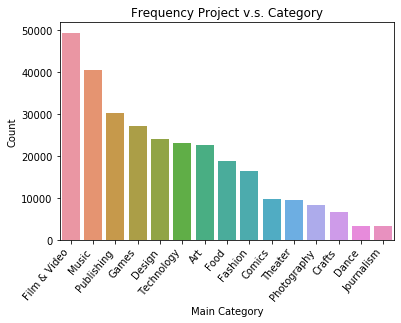

In [24]:
freq_category = sns.countplot(kickstarter_cleaned.main_category,order = kickstarter_cleaned['main_category'].value_counts().index)
freq_category.set_xticklabels(freq_category.get_xticklabels(), rotation=50,horizontalalignment='right')
freq_category.set_title("Frequency Project v.s. Category")
freq_category.set(xlabel='Main Category', ylabel='Count')

plt.show()

The most popular category on Kickstarter is Film & Video, followed by Music, Publishing, and Games. The least popular categories on Kickstarter are Journalism, Dance, and Crafts. We can see that the categories with the highest success rate are also categories with fewer number of projects (e.g. Dance). 

This lead us to wonder whether there is a relationship between number of projects and category success rate.

### Frequency of Project v.s. Category Success Rate 

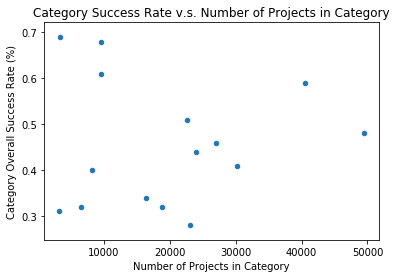

,success_rate,count
success_rate,1.000000,0.009556
count,0.009556,1.000000


In [25]:
df1 = pd.DataFrame({'category':prop.index.tolist(),'success_rate': prop.get('successful')})

df2 = pd.DataFrame({'category':kickstarter_cleaned.main_category.value_counts().index.tolist(),
                    'count': kickstarter_cleaned.main_category.value_counts()})

df3 = pd.merge(df1,df2)

df3.plot(kind='scatter',x='count',y='success_rate')
plt.title('Category Success Rate v.s. Number of Projects in Category')
plt.ylabel('Category Overall Success Rate (%)')
plt.xlabel('Number of Projects in Category')
plt.show()

df3.corr()

There appears to be little correlation between number of projects and category success rate.

### Backers v.s. Category

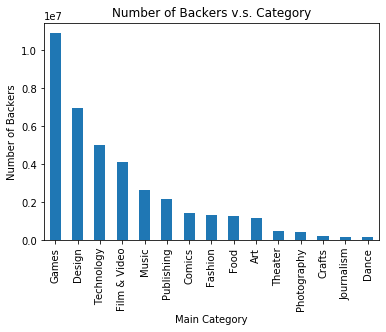

In [26]:
pledged = kickstarter_cleaned.groupby(['main_category']).backers.sum().sort_values(ascending=False)
pledged.plot(kind="bar")
plt.title("Number of Backers v.s. Category")
plt.ylabel('Number of Backers')
plt.xlabel('Main Category')
plt.show()

Categories with the most backers on Kickstarter are Games, Design, and Technology. This may imply that the general audience on Kickstarter are mostly interested in projects within these categories.

### Average Amount Pledged v.s. Category

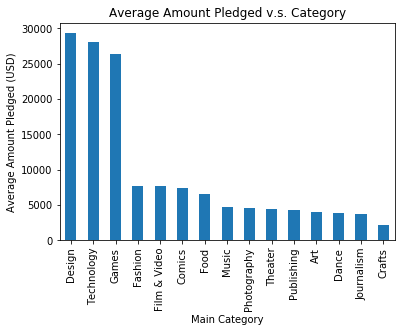

In [27]:
avg_pledged = kickstarter_cleaned.groupby(['main_category']).usd_pledged_real.mean().sort_values(ascending=False)
avg_pledged
avg_pledged.plot(kind="bar")
plt.title("Average Amount Pledged v.s. Category")
plt.ylabel('Average Amount Pledged (USD)')
plt.xlabel('Main Category')
plt.show()

Similar to the results above, we find that Design, Technology and Games are the three main categories with the highest average amount pledged per individual project. This leads us to conclude that while these main categories may not be the genres with the most number of projects started on the website or the highest success rates, these are the type of projects that visitors to Kickstarter care about the most, in terms of willingness to contribute as well as enthusiasm in funding the projects significantly.

## Guiding Question 2: Exploring Highly Successful Projects

In [28]:
kickstarter_cleaned['percent_funded'].describe()

count    292819.000000
mean          3.975700
std         300.693822
min           0.000000
25%           0.030200
50%           0.386500
75%           1.133500
max      104277.890000
Name: percent_funded, dtype: float64

The median of <font color = 'blue'>percent_funded</font> is 38.6%. This makes sense since approximately 54.3% of projects on Kickstarter fail, as mentioned before. Interestingly, we notice that the mean of <font color ='blue'>percent_funded</font> is ~397.6%, which is significantly greater than the median value. This implies that we have many projects with funding that heavily exceeded their goals, which we will now investigate further.

In [29]:
np.percentile(kickstarter_cleaned['percent_funded'],99)

13.230602000000008

The 99th percentile of projects in terms of percentage funded managed to fundraise approximately 1323% of their original goal. Let's discover these projects that have really high funding relative to their goal!

In [30]:
highly_funded = kickstarter_cleaned['percent_funded'] > np.percentile(kickstarter_cleaned['percent_funded'],99)
highly_funded_kickstarters = kickstarter_cleaned[highly_funded].sort_values(by='percent_funded',ascending=False)
highly_funded_kickstarters.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_length,pledged_per_backer,percent_funded
369176,9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17,2016-08-18 09:04:03,successful,3917,US,104277.89,1.0,59,26.621876,104277.89
186096,1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13,2016-10-14 19:04:27,successful,955,US,68764.10,1.0,59,72.004293,68764.10
360721,907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09,2015-08-10 19:31:56,successful,1673,US,55266.57,1.0,59,33.034411,55266.57
76290,1388400809,Energy Hook,Video Games,Games,USD,2013-06-10,2013-05-10 01:22:38,successful,1622,US,41535.01,1.0,30,25.607281,41535.01
81368,1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02,2016-07-12 00:29:12,successful,268,US,32843.00,1.0,20,122.548507,32843.00


In [31]:
highly_funded_kickstarters['usd_goal_real'].value_counts(sort=True).head(10)

1.0        209
1000.0     180
10000.0    149
500.0      145
5000.0     127
100.0      125
20000.0     77
15000.0     73
50000.0     70
10.0        50
Name: usd_goal_real, dtype: int64

We found that most projects with outlier success have very low goals, as low as 1. We look further into these projects with extremely low goals.

In [32]:
low_goal = highly_funded_kickstarters[highly_funded_kickstarters['usd_goal_real'] <= 10]
low_goal.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_length,pledged_per_backer,percent_funded
369176,9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17,2016-08-18 09:04:03,successful,3917,US,104277.89,1.0,59,26.621876,104277.89
186096,1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13,2016-10-14 19:04:27,successful,955,US,68764.10,1.0,59,72.004293,68764.10
360721,907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09,2015-08-10 19:31:56,successful,1673,US,55266.57,1.0,59,33.034411,55266.57
76290,1388400809,Energy Hook,Video Games,Games,USD,2013-06-10,2013-05-10 01:22:38,successful,1622,US,41535.01,1.0,30,25.607281,41535.01
81368,1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02,2016-07-12 00:29:12,successful,268,US,32843.00,1.0,20,122.548507,32843.00


In [33]:
low_goal.main_category.value_counts()

Music           88
Art             55
Games           55
Film & Video    47
Comics          37
Publishing      31
Technology      24
Food            15
Design          14
Crafts           6
Theater          5
Photography      4
Fashion          4
Dance            1
Journalism       1
Name: main_category, dtype: int64

Most projects with goals lower than 10 are in the <font color = 'blue'>main_category</font> of Music, Games, and Art. We searched up some of these projects and realized that these were not all meme/joke projects. For instance, the creator of project **VULFPECK /// Thrill of the Arts** said "I'm confident we will raise the necessary capital to make the album, so that's why I put the goal at $1. This is simply an invitation for anyone that wants to be part of the process!"

Of course, there were also projects that were launched for fun with low goals such as the project **Potato Salad** by Zack Danger Brown, which launched with a goal of 10 dollars but managed to fundraise $55,492. There was no easy way to identify a meme/joke project because some creators just want to leave the goal open-ended as the example given before.

Next, we filter out projects with goals that are too low to see whether there is anything interesting with normal projects that do not have goal less than 50 dollars. 

In [34]:
reasonable_goal = (kickstarter_cleaned['percent_funded'] > np.percentile(kickstarter_cleaned['percent_funded'],99)) & (kickstarter_cleaned['usd_goal_real'] >= 50)

new_highly_funded = kickstarter_cleaned[reasonable_goal]
new_highly_funded.sort_values(by='percent_funded',ascending=False).head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_length,pledged_per_backer,percent_funded
58331,1296661668,Solid Watch,Product Design,Design,USD,2011-08-29,2011-05-31 07:01:49,successful,474,US,134090.00,100.0,89,282.890295,1340.9000
34796,1176482851,TREVOR HALL presents... The Fruitful Darkness,Music,Music,USD,2017-09-06,2017-08-07 20:17:39,successful,2254,US,137570.93,108.0,29,61.034130,1273.8049
162266,1825421712,Keyflower is Awesome!,Tabletop Games,Games,USD,2015-08-11,2015-06-26 19:51:07,successful,2041,US,121033.00,100.0,45,59.300833,1210.3300
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,2015-01-20 19:00:19,successful,219382,US,8782571.99,10000.0,30,40.033239,878.2572
289894,54501146,SpaceTime Coordinates ~ your personal place in...,Product Design,Design,EUR,2015-09-30,2015-08-12 16:07:19,successful,1514,FR,93364.28,111.6,48,61.667292,836.5975


In [35]:
new_highly_funded.main_category.value_counts()

Games           772
Design          649
Technology      365
Fashion         119
Comics           93
Art              91
Publishing       74
Crafts           67
Food             58
Film & Video     32
Music            27
Photography      12
Journalism        3
Theater           2
Name: main_category, dtype: int64

We can see that once projects with extremely low goals are removed, the majority of projects that have outlier success are in the <font color = 'blue'>main_category</font> Games, Design, and Technology.

In [36]:
grouped = new_highly_funded.groupby('main_category').ID.count()
total = kickstarter_cleaned.groupby('main_category').ID.count()
prop = (grouped/total).sort_values(ascending=False)
prop

main_category
Games           0.028543
Design          0.026990
Technology      0.015855
Crafts          0.010203
Comics          0.009685
Fashion         0.007278
Art             0.004025
Food            0.003073
Publishing      0.002446
Photography     0.001456
Journalism      0.000922
Music           0.000666
Film & Video    0.000647
Theater         0.000208
Dance                NaN
Name: ID, dtype: float64

Within the top 1% performing projects with reasonable goals, those in the <font color = 'blue'>main_category</font> of Games as well as Design make up almost 3% of all of the projects in Games and Design. This suggests that these categories tend to have projects that vastly outperform expectations, perhaps because of a novel game idea or groundbreaking design concept.

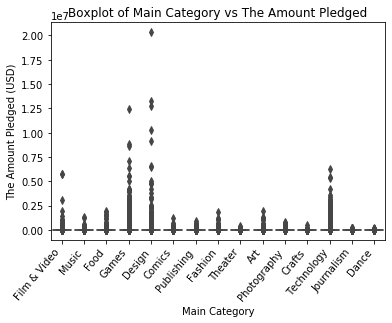

In [37]:
boxplot = sns.boxplot(x="main_category", y="usd_pledged_real", data=kickstarter_cleaned)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=50,horizontalalignment='right')
boxplot.set_title("Boxplot of Main Category vs The Amount Pledged")
boxplot.set_ylabel("The Amount Pledged (USD)")
boxplot.set_xlabel("Main Category")
plt.show()

This boxplot shows that projects in the <font color = 'blue'>main_category</font> of Games, Design, and Technology have extreme outliers for the total amount pledged. This further reinforces the finding that projects in these categories have a higher chance in outperforming their expectations/goals.

## Guiding Question 3: What are some factors that may impact the outcome of a project?

### Median Project Goal by Main Category & State

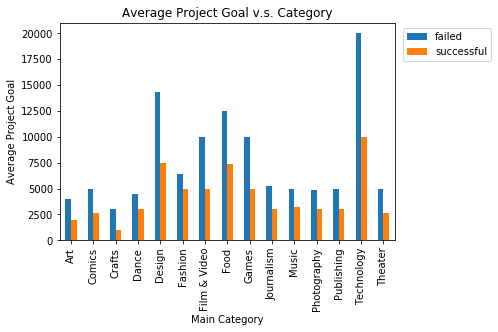

In [38]:
A = kickstarter_cleaned.groupby(['main_category','state']).usd_goal_real.median().unstack()
A.plot(kind='bar')
plt.title("Average Project Goal v.s. Category")
plt.ylabel("Average Project Goal")
plt.xlabel("Main Category")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.show()

We can see that successful projects tend to have lower median of <font color = 'blue'>usd_goal_real</font> than that of failed projects across all categories.

### Average Pledged per Backer by Main Category & State

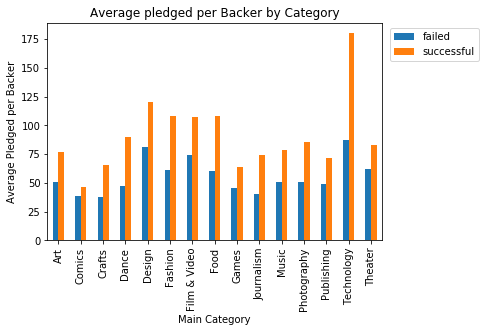

In [39]:
A = kickstarter_cleaned.groupby(['main_category','state']).pledged_per_backer.mean().unstack()
A.plot(kind="bar") 
plt.title("Average pledged per Backer by Category")
plt.ylabel("Average Pledged per Backer")
plt.xlabel("Main Category")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.show()

We can see that the average <font color = 'blue'>pledged_per_backer</font> is higher for successful projects across all categories.

### Average Project Length by Main Category & State

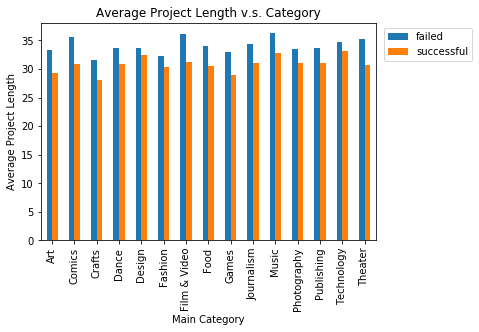

In [40]:
B = kickstarter_cleaned.groupby(['main_category','state']).project_length.mean().unstack()
B.plot(kind='bar')
plt.title("Average Project Length v.s. Category")
plt.ylabel("Average Project Length")
plt.xlabel("Main Category")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.show()

While the difference seems minimal, we indeed notice a consistent trend where failed projects tend to have a longer <font color = 'blue'>project_length</font> than successful projects. While this may seem counterintuitive initially, this could stem from the fact that successful projects tend to go viral in a short span of time, negating the possible benefits of keeping a project running longer. Additionally, setting a project for a longer duration could also reflect the project creators' lack of confidence in the project's ability to generate funds.

# Data Modeling

In [41]:
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In this section, we will attempt to select a model to predict whether a project is 'successful' or 'failed'. We will try logistic regression in smf as well as KNN in sklearn, using functions in sklearn to perform cross validation. Because of the nature of the smf module, we will have to convert the values of <font color = 'blue'>state</font> to 1 or 0.

In [42]:
clean_state = {'state': {'failed': 0, "successful": 1}}
kickstarter_cleaned.replace(clean_state, inplace=True)

## K-Nearest Neighbors

We first tried running a KNN classifier based on the numeric data provided by the columns <font color = 'blue'>usd_goal_real</font>, <font color = 'blue'>project_length</font>, and <font color = 'blue'>pledged_per_backer</font>. To further prepare the data for prediction, we have split our dataset into train and test. We will now using 5-fold cross validation to evaluate our KNN model.

In [43]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(kickstarter_cleaned[['usd_goal_real','project_length','pledged_per_backer']], kickstarter_cleaned[['state']], test_size=0.3)

In [ ]:
k_range = range(1,20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores[k] = np.mean(cross_val_score(knn, X_trainT, y_trainT, cv=5))

In [ ]:
scores

Based on the CV scores from our KNN classifier, we find that K=19 works best for our train dataset. Our average validation accuracy for K=19 was approximately 73% on the test dataset.

We will now fit a 19-NN model on our test dataset.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_trainT,y_trainT)

y_pred = knn.predict(X_testT)
print(metrics.accuracy_score(y_testT, y_pred))
print(y_testT.state.value_counts().iloc[0]/(y_testT.state.value_counts().iloc[0] + y_testT.state.value_counts().iloc[1]))

We obtain a final test accuracy of approximately 74% on the test dataset. This result is indeed significant, as our model prediction represents a noticeable improvement in accuracy (compared to merely predicting 'failed' for all of the validation test data, which would have an accuracy of ~54%).

## Logistic Regression

However, it is difficult to intepret the results of our KNN classifier, which also only uses numeric features. In the interest of creating a model that can be easily understandable as well as accounting for the <font color='blue'>main_category</font> of the project, we will now try a logistic regression model as well, once again first trained on a 5-fold cross validation train dataset.

In [ ]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(kickstarter_cleaned[['main_category','usd_goal_real','project_length','pledged_per_backer']], kickstarter_cleaned[['state']], test_size=0.3)
train_data_set = pd.concat([X_trainT,y_trainT], axis = 1)

In [ ]:
X = train_data_set[['main_category','usd_goal_real','project_length','pledged_per_backer']].reset_index()
y = train_data_set[['state']].reset_index()
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
accuracies = []
default= []

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    y_train['state'] = y_train.state.apply(int)
    y_test['state'] = y_test.state.apply(int)
    logitmodel = smf.logit(formula = 'state ~ main_category + usd_goal_real + project_length + pledged_per_backer', data = pd.concat([X_train, y_train], axis=1))
    results = logitmodel.fit()
    testresult_logit = results.predict(X_test)
    testresult_logit = np.where(testresult_logit > 0.5, 1, 0)
    accuracies.append(np.mean(testresult_logit == y_test.state.to_numpy()))
    default.append(y_test.state.value_counts().iloc[0]/(y_test.state.value_counts().iloc[0] + y_test.state.value_counts().iloc[1]))
    
print(accuracies)
print(np.mean(accuracies))
print(default)
print(np.mean(default))

This time, we obtain a average validation accuracy of approximately 68% on the test dataset. While this accuracy score is lower than the result obtained by KNN, it is still significant, as our model predictions still exhibit an improvement over the default accuracy of ~54% (for predicting every project as 'failed').

After verifying that our model does provide a significant prediction accuracy, we will now attempt to fit our model based on the train data on the test data to obtain our final test accuracy score.

In [ ]:
FINAL_logitmodel = smf.logit(formula = 'state ~ main_category + usd_goal_real + project_length + pledged_per_backer', data = train_data_set)
print(FINAL_logitmodel.fit().summary())

FINAL_testresult_logit = results.predict(X_testT)
FINAL_testresult_logit = np.where(FINAL_testresult_logit > 0.5, 1, 0)
print(np.mean(FINAL_testresult_logit == y_testT.state.to_numpy()))
print(y_testT.state.value_counts().iloc[0]/(y_testT.state.value_counts().iloc[0] + y_testT.state.value_counts().iloc[1]))

Similar to our validation results, we also obtain a final test accuracy score of approximately 68%. Once again, this is a marked improvement on the default result of approximately 54%. 

### Understanding the Logistic Model

We notice that besides the 'Film & Video' categorical option in <font color = 'blue'>main_category</font>, every other feature used in the logistic model were considered to be statistically significant. In addition, the coefficients for our features matches the insights derived from our exploratory analysis.

1. The <font color = 'blue'>main_category</font> of projects appear to have varying impacts on the probability of the project. The intercept is  The 3 highest coefficients belong to the Dance, Theater and Comics categories, while the 3 lowest coefficients belong to Crafts, Technology and Jouralism, all of which match the results from our exploratory analysis of success rate by category.


2. As expected, the coefficient of <font color ='blue'>usd_goal_real</font> is negative. This seems to indicate that the higher a project's goal is set, the harder it is for backers to supply the pledge amount needed to hit the goal. Interestingly, the coefficient for this feature is very close to 0, while still having a very significant p-value. This could mean that while the overall impact of setting a high goal is consistently negative, it does not bode particularly disastrously for a project. Understandably, ambitious projects with naturally high targets (such as projects in the field of Technology) would draw more interested supporters, negating the risk of not hitting the goal so some extent.


3. <font color ='blue'>project_length</font> also has a negative correlation with the probability of a project's success. We previously observed this in comparing the average <font color ='blue'>project_length</font> by category. This trend is something that Kickstarter has also identified, recommending a maximum of 30 days since "Campaigns with shorter durations have higher success rates, and create a helpful sense of urgency around your project". (https://help.kickstarter.com/hc/en-us/articles/115005128434-What-is-the-maximum-project-duration-) 


4. <font color ='blue'>pledged_per_backer</font> also has a positive impact on the success rate. While we had initially theorized that small donations from a large amount of backers could be the key to a project's success, it seems as if conventional wisdom prevails in this scenario. One factor not included in the dataset that could have affected this variable is Kickstarter's reward system, providing an incentive for backers to pledge in increased amounts, pushing projects that backers have faith in particularly in the right direction.

# Conclusion

Although the biggest factor in determining the success of a project is the content and the project itself, there are some external factors that could influence the probability of success. From our investigation, we found that the most well-funded projects on Kickstarter are of the categories Games, Design, and Technology, which gives creators a sense of the target audience they are reaching when they decide to launch their projects on Kickstarter. We have also found that setting a reasonable goal will improve success rate. Lastly, based on our logistic model, we have discovered that the relationships between the variables goal, project length, and pledged per backer are significant in influencing the outcome of the project. Thus, creators should take note of these basic setup of their projects prior to launch.

# Limitations and Further Research

With this dataset, we could observe the basic effects that factors such as category, goal amount, and project length have on the outcome of projects. However, it would be helpful if we can also obtain more information regarding each project as listed below.
- If we have data regarding the reward tiers set up by creators, we can see whether there is an optimal number of rewards or reward pledge amount that would incentivize backers to pledge more and increase the probability of success. 
- While we were working on the project, we wanted to investigate the probability of success of projects that were relaunched but we were limited since we could not easily decide whether projects with the same name are necessarily the same projects. It would be helpful if we also had the names of creators in the dataset.
- Information suggested by prior research, such as whether a campaign includes a video, the length of the description, or the social media presence of the team behind a project simply were not present in this dataset and should be looked into if collected.
- Lastly, it would also be helpful if we have variables that inform us of the number of visits each project has received, and also whether or not the project has been featured or recommended on the platform. This information would help us come up with more insights to advise creators on how to improve the probability of success for their projects. 

# References

- Benavides, N. (2017, September 20). What Makes a Successful Kickstarter Campaign? Retrieved from https://towardsdatascience.com/what-makes-a-successful-kickstarter-campaign-ad36fb3eaf69. 
- Diallo, A. (2014, January 26). Crowdfunding Secrets: 7 Tips For Kickstarter Success. Retrieved from https://www.forbes.com/sites/amadoudiallo/2014/01/24/crowdfunding-secrets-7-tips-for-kickstarter-success/#1a07f5746d8d. 
- Kromel. (2018, April 5). Kickstarter - Successful vs Failed. Retrieved from https://www.kaggle.com/kromel/kickstarter-successful-vs-failed. 
- Mitroff, S. (2017, June 3). 4 Keys to a Winning Kickstarter Campaign. Retrieved from https://www.wired.com/2012/07/kickstarter/. 
